## 1.Loading the dataset

In [3]:
import pandas as pd # load and manipulate data and for One-Hot Encoding
import numpy as np # calculate the mean and standard deviation
import matplotlib.pyplot as plt # drawing graphs
from sklearn.tree import DecisionTreeClassifier # a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

import os

In [4]:
train_data = pd.read_csv("/content/Train_dataset.csv")
train_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,patient_id
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,179
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,228
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1,111
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,246
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,60


In [5]:
X = train_data.drop('output', axis=1).copy()
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,patient_id
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,179
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,228
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,111
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,246
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,60


In [6]:
y= train_data['output'].copy()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: output, dtype: int64

In [7]:
X.dtypes

age             int64
sex             int64
cp              int64
trtbps          int64
chol            int64
fbs             int64
restecg         int64
thalachh        int64
exng            int64
oldpeak       float64
slp             int64
caa             int64
thall           int64
patient_id      int64
dtype: object

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
clf_dt = DecisionTreeClassifier(random_state=42)
print(clf_dt)
clf_dt = clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


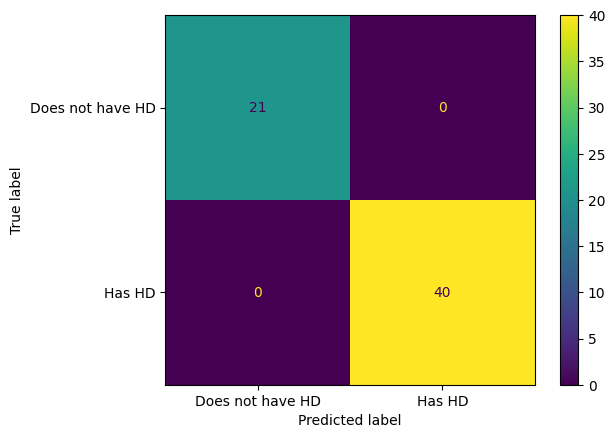

In [9]:
predictions=clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Does not have HD", "Has HD"])
disp.plot()

In [10]:
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV

predictions = (clf_dt.predict(X_test))
original_df = pd.read_csv('/content/test_dataset.csv')['patient_id']
#original_df['output'] = predictions



output = pd.DataFrame({ 'patient_id' : original_df, 'output': predictions })
output.to_csv('qq.csv', index = False)
output.head()
files.download('qq.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
test_data = pd.read_csv("/content/test_dataset.csv")
test_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,patient_id
0,45,0,1,112,160,0,1,138,0,0.0,1,0,2,94
1,55,0,0,180,327,0,2,117,1,3.4,1,0,2,266
2,35,1,0,120,198,0,1,130,1,1.6,1,0,3,227
3,59,1,3,134,204,0,1,162,0,0.8,2,2,2,286
4,60,1,0,125,258,0,0,141,1,2.8,1,1,3,201


In [12]:
from sklearn.ensemble import RandomForestClassifier
y = train_data["output"]

features = ["age", "sex", "cp", "trtbps","chol","fbs","restecg","thalachh","exng","oldpeak","slp","caa","thall","patient_id"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'patient_id': test_data.patient_id, 'output': predictions})
output.to_csv('submission.csv', index=False)
files.download('submission.csv')
print("Your submission was successfully saved!")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Your submission was successfully saved!
